# Dynamics of $e^z+z^2+z+1$  

from https://mathoverflow.net/questions/472838/dynamics-of-ezz2z1

In [1]:
using Plots, Plots.PlotMeasures

In [2]:
f(z) = exp(z)+z^2+z+1

f (generic function with 1 method)

In [3]:
function Julia(xmin, xmax, ymin, ymax, width, height, maxiter = 100, R = 1e+300)
    xrange = range(xmin, xmax, length=width)
    yrange = range(ymin, ymax, length=height)

    zrange = complex.(xrange', yrange)

    function iter(z)
        for k=1:maxiter
            z = f(z)
            if ((abs2(z)>R) || (isinf(z)))
                return k
                break
            end
        end
        return -50
    end

    mesh = map(iter, zrange);

    return xrange, yrange, mesh
end


Julia (generic function with 3 methods)

In [4]:
r=2*pi
@time xrange, yrange, mesh = Julia(-r,r,-r,r,800,800,100)

  0.153059 seconds (254.83 k allocations: 31.598 MiB, 38.56% compilation time)


(-6.283185307179586:0.01572762279644452:6.283185307179586, -6.283185307179586:0.01572762279644452:6.283185307179586, [4 4 … 2 2; 4 4 … 2 2; … ; 4 4 … 2 2; 4 4 … 2 2])

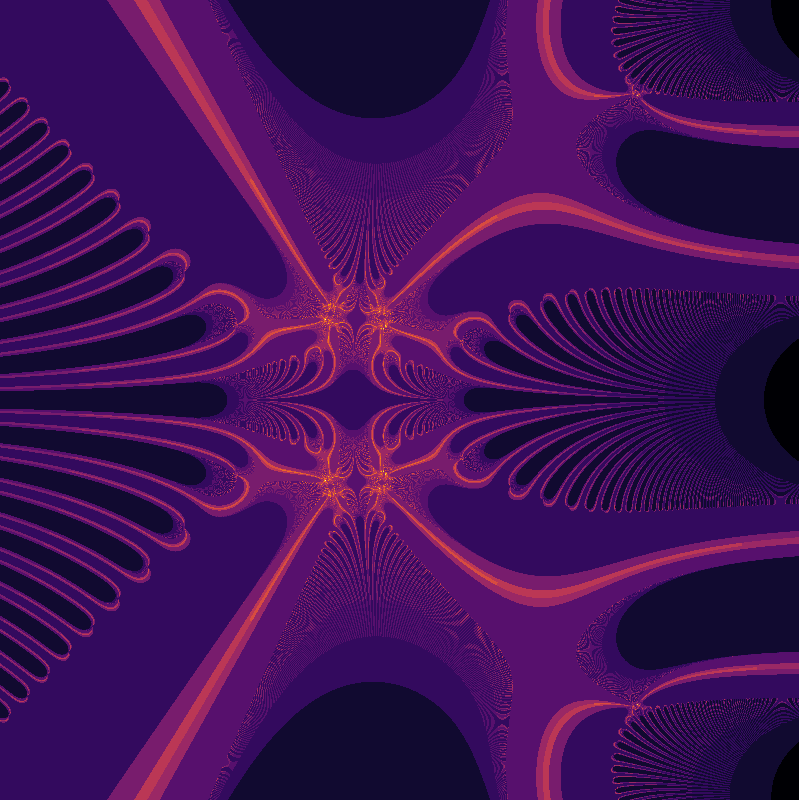

In [6]:
heatmap(xrange, yrange, mesh, size=(800,800), colorbar=false, ticks=false, frame=false, margins=-2mm)

In [ ]:
savefig("exp+quad.png")